In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [36]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)


## 数据预处理


In [37]:
# 查看数据是否有缺失值
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [38]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [39]:
# 修改列名
df = df.rename(columns={'satisfaction_level': 'satisfaction', 'last_evaluation': 'evaluation', 'number_project': 'projectCount', 'average_montly_hours': 'averageMonthlyHours', 'time_spend_company': 'yearsAtCompany', 'Work_accident': 'workAccident', 'promotion_last_5yeats': 'promotion', 'sales': 'department', 'left': 'turnover'})

In [40]:
# 将标签列放到最前面
front = df['turnover']
df.drop('turnover', axis=1, inplace=True)
df.insert(0, 'turnover', front) # 插入列
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion_last_5years,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## 分析数据


In [41]:
df.shape


(14999, 10)

In [42]:
# 查看数据类型
df.dtypes

turnover                   int64
satisfaction             float64
evaluation               float64
projectCount               int64
averageMonthlyHours        int64
yearsAtCompany             int64
workAccident               int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [43]:
# 数据分类不平衡
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [44]:
# 对数据进行统计
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [45]:
# 查看每种类别的平均结果
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion_last_5years
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 相关性分析


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion_last_5years
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


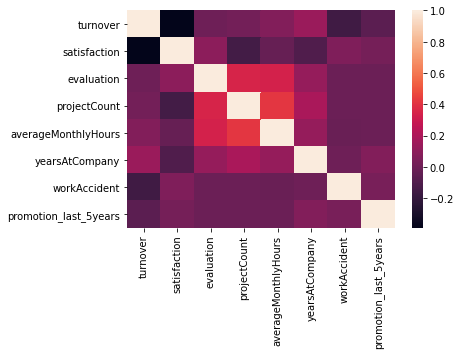

In [46]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
corr


In [47]:
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover'] == 1]['satisfaction'].mean()

print('未离职员工满意度: ' + str(emp_population))
print('离职员工满意度: ' + str(emp_turnover_satisfaction))


未离职员工满意度: 0.666809590479516
离职员工满意度: 0.44009801176140917


## 统计检验


In [48]:
import scipy.stats as stats
stats.ttest_1samp(a=df[df['turnover'] == 1]['satisfaction'], popmean=emp_population)


Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

In [49]:
degree_freedom = len(df[df['turnover'] == 1])
LQ = stats.t.ppf(0.025, degree_freedom) # 95%置信区间的左边界
RQ = stats.t.ppf(0.975, degree_freedom) # 95%置信区间的右边界

print('t-分布左边界: ' + str(LQ))
print('t-分布右边界: ' + str(RQ))

t-分布左边界: -1.9606285215955626
t-分布右边界: 1.9606285215955621


Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover vs No Turnover')

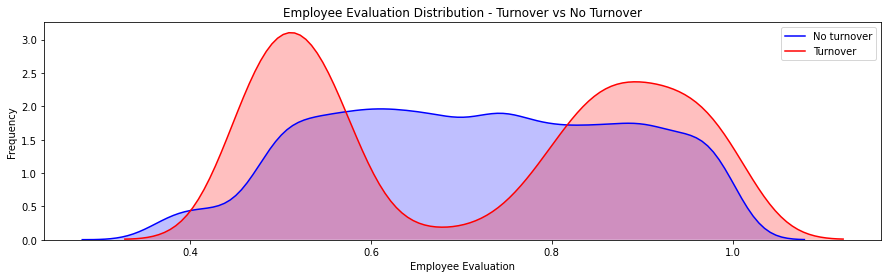

In [50]:
# 绘制概率密度函数
fig = plt.figure(figsize=(15, 4), )
ax = sns.kdeplot(df.loc[df['turnover'] == 0, 'evaluation'], color='b', shade=True, label='No turnover')
ax = sns.kdeplot(df.loc[df['turnover'] == 1, 'evaluation'], color='r', shade=True, label='Turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover vs No Turnover')

Text(0.5, 1.0, 'Employee Average Monthly Hours Distribution - Turnover vs No Turnover')

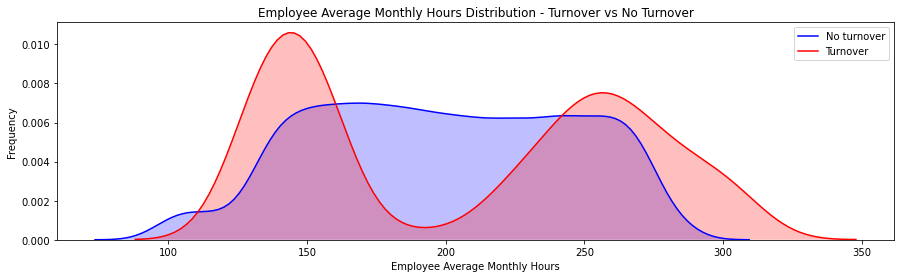

In [51]:
fig = plt.figure(figsize=(15, 4), )
ax = sns.kdeplot(df.loc[df['turnover'] == 0, 'averageMonthlyHours'], color='b', shade=True, label='No turnover')
ax = sns.kdeplot(df.loc[df['turnover'] == 1, 'averageMonthlyHours'], color='r', shade=True, label='Turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee Average Monthly Hours Distribution - Turnover vs No Turnover')


Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover vs No Turnover')

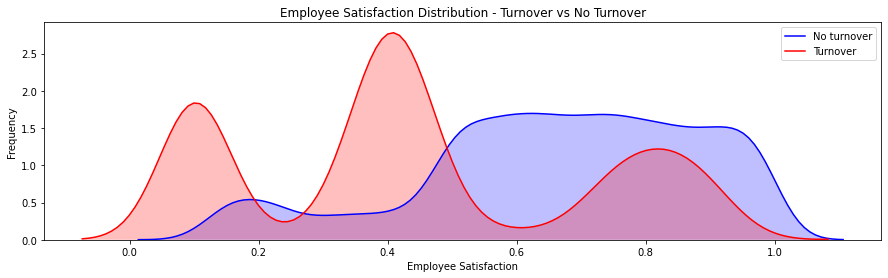

In [52]:
fig = plt.figure(figsize=(15, 4), )
ax = sns.kdeplot(df.loc[df['turnover'] == 0, 'satisfaction'], color='b', shade=True, label='No turnover')
ax = sns.kdeplot(df.loc[df['turnover'] == 1, 'satisfaction'], color='r', shade=True, label='Turnover')
ax.set(xlabel='Employee Satisfaction', ylabel='Frequency')
plt.title('Employee Satisfaction Distribution - Turnover vs No Turnover')


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# 将string类型转换为整数类型
df['department'] = df['department'].astype('category').cat.codes
df['salary'] = df['salary'].astype('category').cat.codes

X = df.drop('turnover', axis=1)
y = df['turnover']

# 注意stratify参数，设为y表示在拆分的训练数据与测试数据中，离职元的百分比仍与原数据中保持一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion_last_5years,department,salary
0,1,0.38,0.53,2,157,3,0,0,7,1
1,1,0.80,0.86,5,262,6,0,0,7,2
2,1,0.11,0.88,7,272,4,0,0,7,2
3,1,0.72,0.87,5,223,5,0,0,7,1
4,1,0.37,0.52,2,159,3,0,0,7,1


## Decision Tree vs Random Forest


In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [56]:
dtree = DecisionTreeClassifier(criterion='entropy', min_weight_fraction_leaf=0.01)
# max_depth定义树的深度，用于防止过拟合；min_weight_fraction_leaf定义叶子节点最少需要包含多少样本，防止过拟合
dtree.fit(X_train, y_train)
print('\n\n------决策树------')
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print('决策树AUC: {:.2f}'.format(dt_roc_auc))
print(classification_report(y_test, dtree.predict(X_test)))

rf = RandomForestClassifier(criterion='entropy', n_estimators=1000, max_depth=None, min_samples_split=10)
# min_samples_split定义至少多少个样本的情况下才继续分叉，防止过拟合
rf.fit(X_train, y_train)
print('\n\n------随机森林------')
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print('随机森林AUC: {:.2f}'.format(rf_roc_auc))
print(classification_report(y_test, rf.predict(X_test)))



------决策树------
决策树AUC: 0.93
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1714
           1       0.93      0.89      0.91       536

    accuracy                           0.96      2250
   macro avg       0.95      0.93      0.94      2250
weighted avg       0.96      0.96      0.96      2250



------随机森林------
随机森林AUC: 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1714
           1       0.99      0.94      0.96       536

    accuracy                           0.98      2250
   macro avg       0.99      0.97      0.98      2250
weighted avg       0.98      0.98      0.98      2250



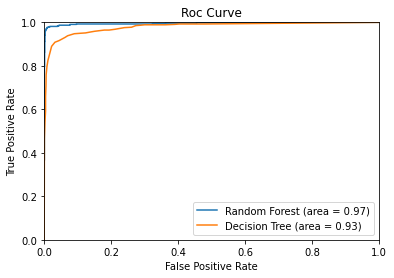

In [57]:
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = {:.2f})'.format(rf_roc_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = {:.2f})'.format(dt_roc_auc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

## 分析不同特征的重要性


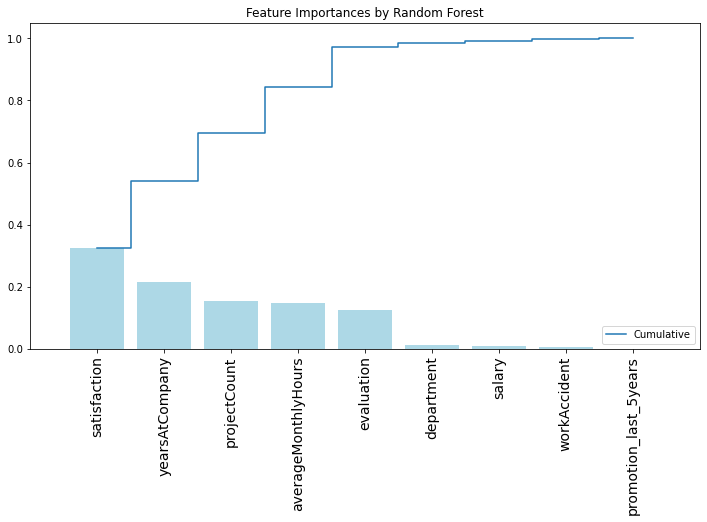

In [58]:
importances = rf.feature_importances_
feat_name = df.drop('turnover', axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6), )
plt.title('Feature Importances by Random Forest')
plt.bar(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_name[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.legend(loc='lower right')
plt.show()

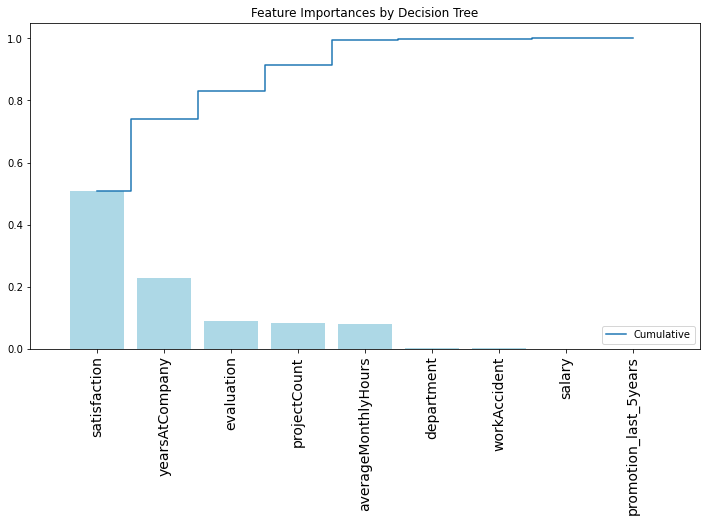

In [59]:
importances = dtree.feature_importances_
feat_name = df.drop('turnover', axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6), )
plt.title('Feature Importances by Decision Tree')
plt.bar(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_name[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.legend(loc='lower right')
plt.show()
